# L1 (lasso Regularazation)

* The value of columns whose values are much less than 0 is not very useful for predicting the final result, so the job of L1 is to set them to zero.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('house_data.csv')
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900.0
1,6414100192,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000.0
2,5631500400,20150225T000000,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000.0
3,2487200875,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000.0
4,1954400510,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000.0


In [4]:
# here date column is not numaric value so we are just taking numaric column
numeric_df = df.select_dtypes(include=['number'])

<Axes: >

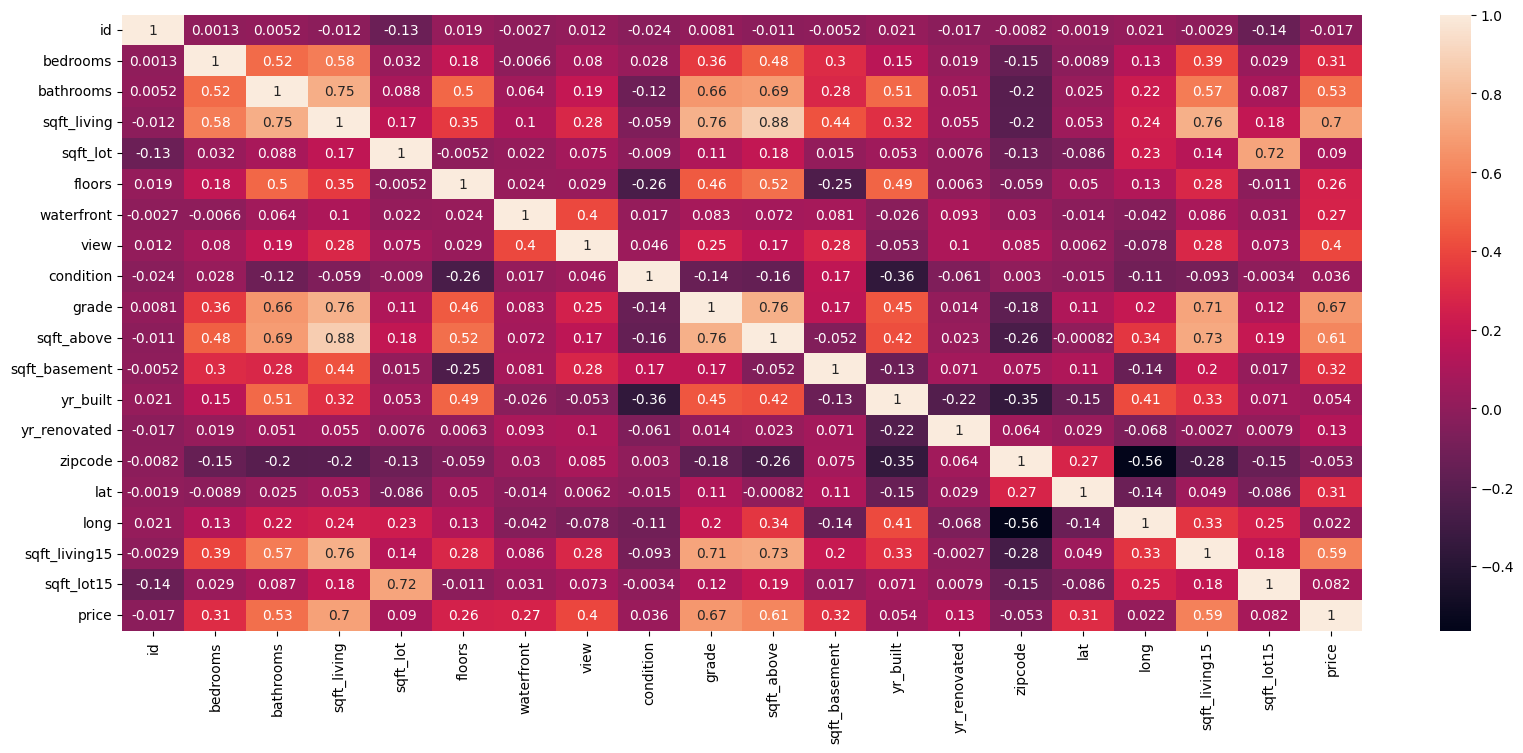

In [5]:
plt.figure(figsize=(20,8))
sns.heatmap(data =numeric_df.corr(),annot=True)

In [6]:
# They are the colums that are not effective in predict to the price 
target_corr = numeric_df.corr()['price'].drop('price')

low_corr_features = target_corr[abs(target_corr) < 0.1].index.tolist()

print("Low correlation features:", low_corr_features)


Low correlation features: ['id', 'sqft_lot', 'condition', 'yr_built', 'zipcode', 'long', 'sqft_lot15']


* now we are doing linear regrassion


In [7]:
x= numeric_df.iloc[:,:-1]
y= numeric_df['price']

In [8]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x),columns=x.columns)
x.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.886146,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.734708,-0.658681,-0.544898,-0.210128,1.870152,-0.352572,-0.306079,-0.943355,-0.260715
1,0.637511,-0.398737,0.175607,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,0.460841,0.245141,-0.681079,4.746678,0.879568,1.161568,-0.746341,-0.432686,-0.187868
2,0.365444,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.409587,-1.229834,-0.658681,-1.293892,-0.210128,-0.933388,1.283537,-0.135655,1.070140,-0.172375
3,-0.727656,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.558836,-0.891699,1.397515,-0.204446,-0.210128,1.085160,-0.283288,-1.271816,-0.914174,-0.284522
4,-0.912881,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,0.291916,-0.130895,-0.658681,0.544548,-0.210128,-0.073636,0.409550,1.199335,-0.272190,-0.192849


In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [11]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)*100

70.12538063710025

In [12]:
lr.coef_

array([ -3872.08469941, -31937.72507863,  34366.52036879,  80786.98281445,
         3330.49870625,   3783.65142717,  48635.46969305,  41271.98222681,
        15878.79225061, 111440.40958155,  75393.82275465,  26583.34392471,
       -78843.62324213,   8133.32791179, -29530.19984001,  82507.70977634,
       -27149.58518525,  14472.77883683,  -9273.77753698])

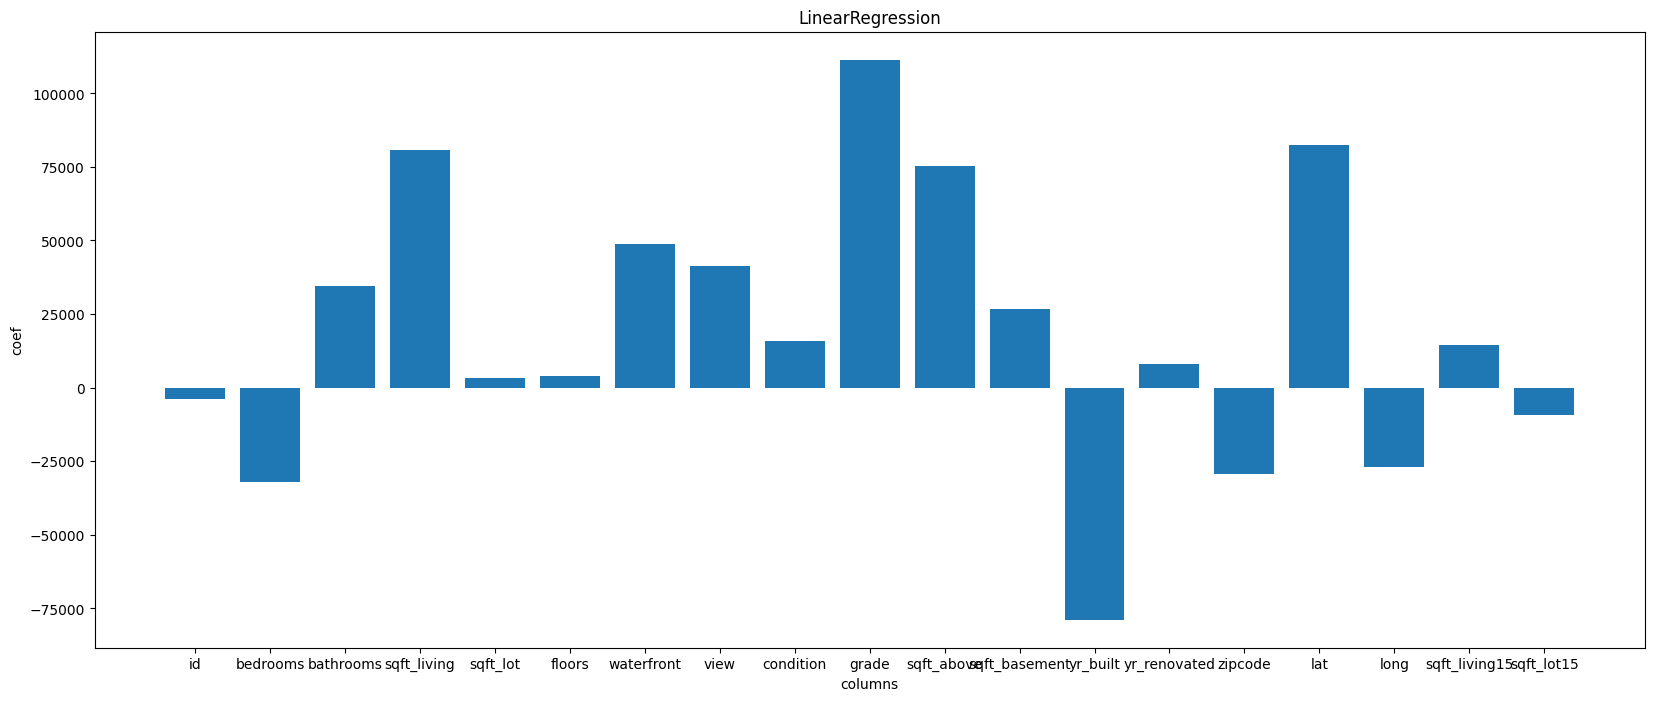

In [13]:
# graphycally we can see lr.coef_
plt.figure(figsize=(20,8))
plt.bar(x.columns,lr.coef_)
plt.title('LinearRegression')
plt.xlabel('columns')
plt.ylabel('coef')
plt.show()

* check how much error

In [33]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np

In [35]:
print(mean_squared_error(y_test,lr.predict(x_test)))
print(mean_absolute_error(y_test,lr.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,lr.predict(x_test))))

45216641478.00795
127593.08006427954
212642.050117111


# lasso

* we are use for featutes selection.

In [24]:
la = Lasso(alpha =10)
la.fit(x_train,y_train)
la.score(x_test,y_test)*100

C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.022e+13, tolerance: 2.262e+11
  model = cd_fast.enet_coordinate_descent(


70.12511360738797

* model Accuracy is almost same.

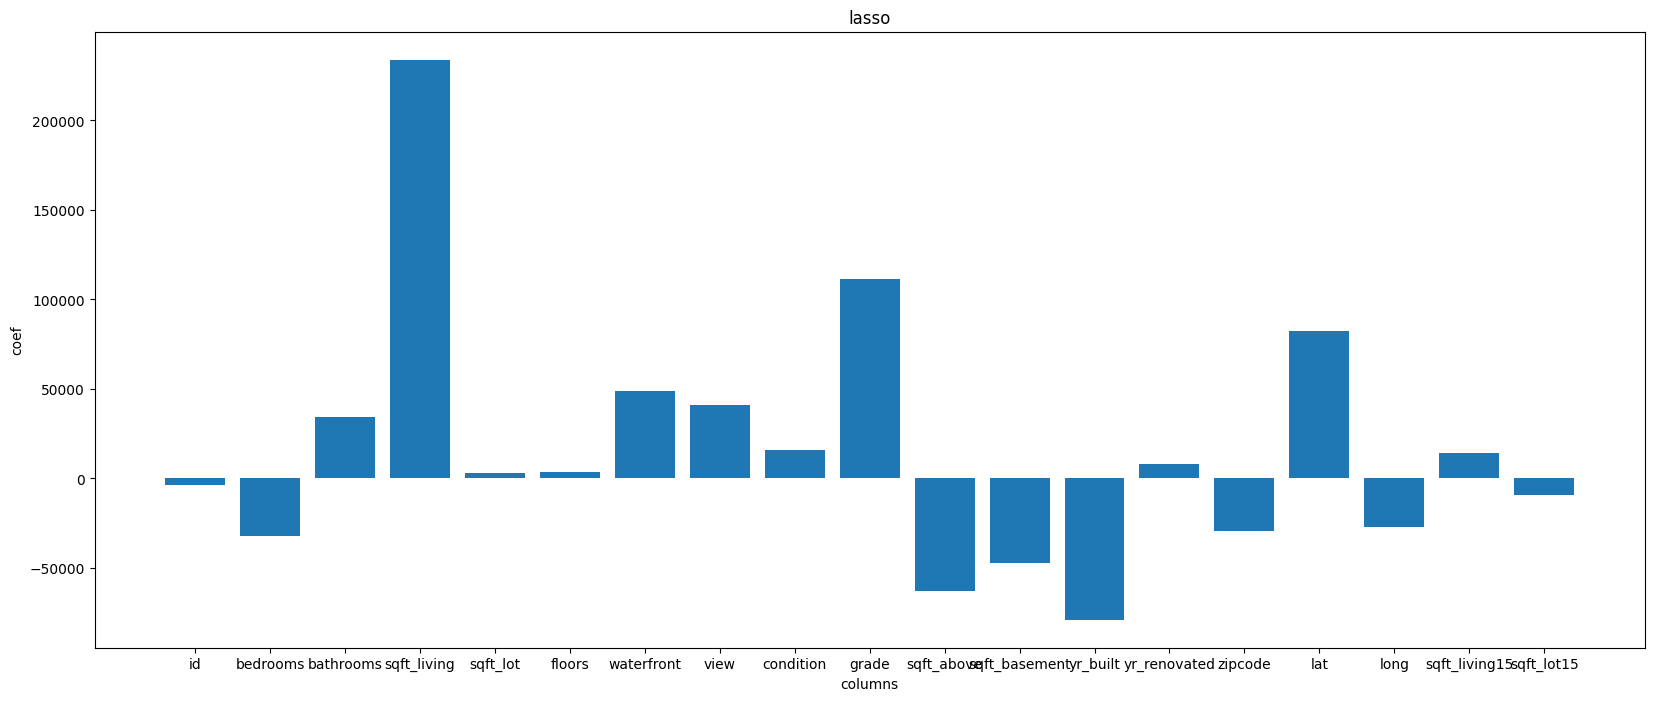

In [25]:
# graphycally we can see lasso
plt.figure(figsize=(20,8))
plt.bar(x.columns,la.coef_)
plt.title('lasso')
plt.xlabel('columns')
plt.ylabel('coef')
plt.show()

* check how much error

In [36]:
print(mean_squared_error(y_test,la.predict(x_test)))
print(mean_absolute_error(y_test,la.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,la.predict(x_test))))

45217045640.0365
127593.01564783383
212643.00044919536


# L2 (Ridge Regularazation)

* **L2 regularization (Ridge)** is a technique that keeps all the features in the model, but reduces the weights (coefficients) of those features that have less impact on the final prediction — without making them exactly zero.

In [29]:
ri = Ridge(alpha=10)
ri.fit(x_train,y_train)
ri.score(x_test,y_test)*100

70.12361173430864

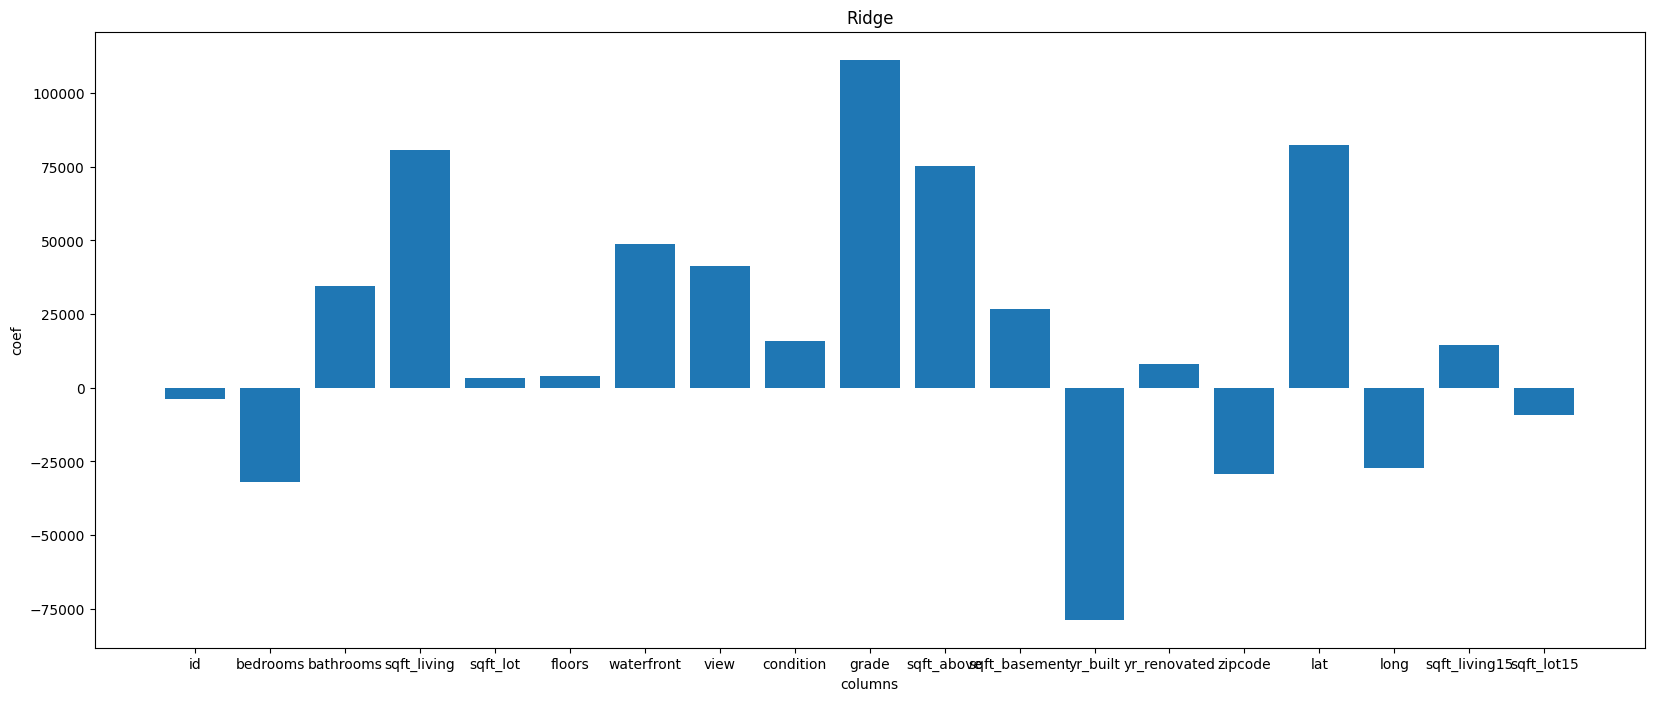

In [30]:
# graphycally we can see ridge
plt.figure(figsize=(20,8))
plt.bar(x.columns,ri.coef_)
plt.title('Ridge')
plt.xlabel('columns')
plt.ylabel('coef')
plt.show()

* check how much error

In [37]:
print(mean_squared_error(y_test,ri.predict(x_test)))
print(mean_absolute_error(y_test,ri.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,ri.predict(x_test))))

45219318795.57862
127573.63385370868
212648.34538641165


* compare Coefficient value

In [41]:
dataset = pd.DataFrame({'col_name':x.columns,
                       "LinearRegression":lr.coef_,
                       'Lasso':la.coef_,
                       'Ridge':ri.coef_})
dataset

,col_name,LinearRegression,Lasso,Ridge
0,id,-3872.084699,-3862.843508,-3869.907396
1,bedrooms,-31937.725079,-31926.268942,-31870.745815
2,bathrooms,34366.520369,34300.099847,34347.083139
3,sqft_living,80786.982814,234012.432623,80737.828287
4,sqft_lot,3330.498706,3293.431557,3331.803449
5,floors,3783.651427,3781.577667,3802.447169
6,waterfront,48635.469693,48627.947376,48614.006617
7,view,41271.982227,41272.284753,41272.093859
8,condition,15878.792251,15867.623385,15896.188901
9,grade,111440.409582,111466.040716,111315.882630
